## Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('cargurus.csv')

## Show Top 5 Records

In [3]:
df.head()

Unnamed: 0   makeName    modelName makeId  carYear               trimName  \
0           0       Jeep      Compass    m32     2021           Latitude 4WD   
1           1        RAM         1500   m191     2022  Big Horn Crew Cab 4WD   
2           2  Chevrolet  Trailblazer     m1     2023                 LT AWD   
3           3       Ford        F-150     m2     2016       XL SuperCrew 4WD   
4           4      Honda         CR-V     m6     2013                 LX AWD   

  localizedTransmission bodyTypeGroupId     bodyTypeName   mileage  ...  \
0     9-Speed Automatic             bg7  SUV / Crossover   23160.0  ...   
1     8-Speed Automatic             bg5     Pickup Truck   55327.0  ...   
2     9-Speed Automatic             bg7  SUV / Crossover   29857.0  ...   
3     6-Speed Automatic             bg5     Pickup Truck  106068.0  ...   
4     5-Speed Automatic             bg7  SUV / Crossover  144150.0  ...   

  localizedInteriorColor sellerRating  reviewCount      howToShop  \
0                  Black     4.333333         12.0   PICK_UP_ONLY   
1                  Black     4.166667          5.0   PICK_UP_ONLY   
2                  Black          NaN          NaN   PICK_UP_ONLY   
3        Dark Earth Gray     3.833333          6.0  HOME_DROP_OFF   
4                   Gray     3.000000          2.0   PICK_UP_ONLY   

   localizedFuelType  localizedDoors        driveTrain  \
0           Gasoline         4 doors  FOUR_WHEEL_DRIVE   
1           Gasoline         4 doors  FOUR_WHEEL_DRIVE   
2           Gasoline         4 doors  FOUR_WHEEL_DRIVE   
3  Flex Fuel Vehicle         4 doors  FOUR_WHEEL_DRIVE   
4           Gasoline         4 doors   ALL_WHEEL_DRIVE   

   localizedEngineDisplayName  ncapOverallSafetyRating    interiorColor  
0              180 hp 2.4L I4                        4            Black  
1              305 hp 3.6L V6                Not Rated            Black  
2              155 hp 1.3L I3                Not Rated            Black  
3     5L V8 Flex Fuel Vehicle                Not Rated  Dark Earth Gray  
4              185 hp 2.4L I4                        5             Gray  

[5 rows x 33 columns]

## Drop 'Unnamed: 0' column

In [4]:
df =df.drop(['Unnamed: 0'],axis=1)

## Shape of the dataset

In [5]:
df.shape

(1846, 32)

## Check Missing values

In [6]:
df.isna().sum()

makeName                        0
modelName                       0
makeId                          0
carYear                         0
trimName                       11
localizedTransmission          17
bodyTypeGroupId                 1
bodyTypeName                    1
mileage                        12
exteriorColorName              39
normalizedExteriorColor         0
priceDifferential              55
daysOnMarket                    0
dealRating                     54
sellerId                        0
listingPartnerId                0
sellerPostalCode                0
distance                        0
serviceProviderId               0
serviceProviderName             0
localizedDriveTrain            14
localizedExteriorColor         39
localizedInteriorColor         64
sellerRating                  151
reviewCount                   151
howToShop                       0
localizedFuelType              10
localizedDoors                 14
driveTrain                     14
localizedEngin

## Correlation Analysis between Numeric Features and Encoded Deal Ratings

In [47]:
from sklearn.preprocessing import LabelEncoder

# Encode 'dealRating' column
label_encoder = LabelEncoder()
df['dealRating_encoded'] = label_encoder.fit_transform(df['dealRating'])

# Compute correlation with numeric features
correlation = df[numeric_features + ['dealRating_encoded']].corr()['dealRating_encoded'].sort_values(ascending=False)
correlation

dealRating_encoded    1.000000
daysOnMarket          0.070492
distance              0.059196
sellerId              0.055533
serviceProviderId     0.004609
mileage               0.004278
sellerPostalCode      0.000226
reviewCount          -0.013701
sellerRating         -0.050779
listingPartnerId     -0.061643
carYear              -0.073621
priceDifferential    -0.259117
Name: dealRating_encoded, dtype: float64

## Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   makeName                    1846 non-null   object 
 1   modelName                   1846 non-null   object 
 2   makeId                      1846 non-null   object 
 3   carYear                     1846 non-null   int64  
 4   trimName                    1835 non-null   object 
 5   localizedTransmission       1829 non-null   object 
 6   bodyTypeGroupId             1845 non-null   object 
 7   bodyTypeName                1845 non-null   object 
 8   mileage                     1834 non-null   float64
 9   exteriorColorName           1807 non-null   object 
 10  normalizedExteriorColor     1846 non-null   object 
 11  priceDifferential           1791 non-null   float64
 12  daysOnMarket                1846 non-null   int64  
 13  dealRating                  1792 

## Checking the number of unique values of each column

In [8]:
df.nunique()

makeName                        41
modelName                      319
makeId                          41
carYear                         33
trimName                       659
localizedTransmission           26
bodyTypeGroupId                  9
bodyTypeName                     9
mileage                       1816
exteriorColorName              459
normalizedExteriorColor         14
priceDifferential             1512
daysOnMarket                   254
dealRating                       6
sellerId                        39
listingPartnerId                12
sellerPostalCode                28
distance                        36
serviceProviderId               36
serviceProviderName             36
localizedDriveTrain              5
localizedExteriorColor         451
localizedInteriorColor         232
sellerRating                    20
reviewCount                     13
howToShop                        2
localizedFuelType                6
localizedDoors                   3
driveTrain          

## Check statistics of data set

In [9]:
df.describe()

carYear        mileage  priceDifferential  daysOnMarket  \
count  1846.00000    1834.000000        1791.000000   1846.000000   
mean   2019.22156   50175.505998          54.465662     57.436078   
std       3.87028   38354.713757        2367.608466     83.242884   
min    1983.00000      55.000000      -63101.000000      0.000000   
25%    2018.00000   21955.500000        -754.000000     11.000000   
50%    2020.00000   41571.000000          83.000000     27.000000   
75%    2021.00000   71804.750000         931.500000     68.000000   
max    2024.00000  389798.000000       14234.000000   1195.000000   

           sellerId  listingPartnerId  sellerPostalCode     distance  \
count  1.846000e+03       1846.000000       1846.000000  1846.000000   
mean   1.421080e+06         53.362405      21668.237270    31.042388   
std    5.366329e+05         25.242956      10365.154306    13.185212   
min    3.446480e+05         24.000000      15010.000000     8.004024   
25%    9.765190e+05         46.000000      15301.000000    20.944881   
50%    1.455316e+06         52.000000      15642.000000    33.266083   
75%    1.876998e+06         52.000000      26059.000000    43.001840   
max    2.211245e+06        172.000000      44615.000000    48.696846   

       serviceProviderId  sellerRating  reviewCount  
count        1846.000000   1695.000000  1695.000000  
mean       284276.586674      4.236487     6.820649  
std        114802.848347      0.716106     5.181561  
min         57300.000000      1.000000     0.000000  
25%        274560.000000      3.833333     3.000000  
50%        294583.500000      4.437500     5.000000  
75%        372846.000000      4.789474     9.000000  
max        446919.000000      5.000000    19.000000

## Exploring Data

In [10]:
df.head()

makeName    modelName makeId  carYear               trimName  \
0       Jeep      Compass    m32     2021           Latitude 4WD   
1        RAM         1500   m191     2022  Big Horn Crew Cab 4WD   
2  Chevrolet  Trailblazer     m1     2023                 LT AWD   
3       Ford        F-150     m2     2016       XL SuperCrew 4WD   
4      Honda         CR-V     m6     2013                 LX AWD   

  localizedTransmission bodyTypeGroupId     bodyTypeName   mileage  \
0     9-Speed Automatic             bg7  SUV / Crossover   23160.0   
1     8-Speed Automatic             bg5     Pickup Truck   55327.0   
2     9-Speed Automatic             bg7  SUV / Crossover   29857.0   
3     6-Speed Automatic             bg5     Pickup Truck  106068.0   
4     5-Speed Automatic             bg7  SUV / Crossover  144150.0   

                 exteriorColorName  ... localizedInteriorColor  sellerRating  \
0  Diamond Black Crystal Pearlcoat  ...                  Black      4.333333   
1  Diamond Black Crystal Pearlcoat  ...                  Black      4.166667   
2            Mosaic Black Metallic  ...                  Black           NaN   
3                         Race Red  ...        Dark Earth Gray      3.833333   
4                             Blue  ...                   Gray      3.000000   

   reviewCount      howToShop  localizedFuelType  localizedDoors  \
0         12.0   PICK_UP_ONLY           Gasoline         4 doors   
1          5.0   PICK_UP_ONLY           Gasoline         4 doors   
2          NaN   PICK_UP_ONLY           Gasoline         4 doors   
3          6.0  HOME_DROP_OFF  Flex Fuel Vehicle         4 doors   
4          2.0   PICK_UP_ONLY           Gasoline         4 doors   

         driveTrain  localizedEngineDisplayName  ncapOverallSafetyRating  \
0  FOUR_WHEEL_DRIVE              180 hp 2.4L I4                        4   
1  FOUR_WHEEL_DRIVE              305 hp 3.6L V6                Not Rated   
2  FOUR_WHEEL_DRIVE              155 hp 1.3L I3                Not Rated   
3  FOUR_WHEEL_DRIVE     5L V8 Flex Fuel Vehicle                Not Rated   
4   ALL_WHEEL_DRIVE              185 hp 2.4L I4                        5   

     interiorColor  
0            Black  
1            Black  
2            Black  
3  Dark Earth Gray  
4             Gray  

[5 rows x 32 columns]

## Exploring Categorical Features in the Dataset

In [11]:
categorical_features  = categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for column in categorical_features :
    print(f"Categories in '{column}' variable: ", end="")
    print(df[column].unique())

Categories in 'makeName' variable: ['Jeep' 'RAM' 'Chevrolet' 'Ford' 'Honda' 'Chrysler' 'Buick' 'Kia' 'Toyota'
 'Nissan' 'GMC' 'Subaru' 'Mazda' 'Hyundai' 'Jaguar' 'Dodge' 'Maserati'
 'Volkswagen' 'Mercedes-Benz' 'Mitsubishi' 'BMW' 'Cadillac' 'Land Rover'
 'Acura' 'Audi' 'Tesla' 'Volvo' 'Lexus' 'MINI' 'Porsche' 'Saturn'
 'Pontiac' 'Wagoneer' 'McLaren' 'INFINITI' 'Bentley' 'Lincoln'
 'Alfa Romeo' 'Lamborghini' 'Hummer' 'Genesis']
Categories in 'modelName' variable: ['Compass' '1500' 'Trailblazer' 'F-150' 'CR-V' 'Tahoe' 'Grand Cherokee'
 'Explorer' 'Town & Country' 'LaCrosse' 'Soul' 'Prius' 'RAV4' 'Edge'
 'Impala' 'Cherokee' 'Silverado 1500' '2500' 'Xterra' 'Rio5' 'Sierra 1500'
 'Trax' 'Equinox' '4Runner' 'Sportage' 'Silverado 3500HD' 'Wrangler'
 'Sorento' 'Colorado' 'Transit Cargo' 'Acadia' 'RAV4 Hybrid' 'Outback'
 'CX-5' 'Pacifica' 'Mustang' 'Renegade' 'Civic Coupe' 'ProMaster' 'Escape'
 'EcoSport' 'Tacoma' 'F-250 Super Duty' 'Cruze' 'Elantra' 'F-PACE' 'Kona'
 'Durango' 'GranTurismo' 'Ro

## Identifying Numerical and Categorical Features in the Dataset

In [12]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))


We have 11 numerical features: ['carYear', 'mileage', 'priceDifferential', 'daysOnMarket', 'sellerId', 'listingPartnerId', 'sellerPostalCode', 'distance', 'serviceProviderId', 'sellerRating', 'reviewCount']

We have 21 categorical features: ['makeName', 'modelName', 'makeId', 'trimName', 'localizedTransmission', 'bodyTypeGroupId', 'bodyTypeName', 'exteriorColorName', 'normalizedExteriorColor', 'dealRating', 'serviceProviderName', 'localizedDriveTrain', 'localizedExteriorColor', 'localizedInteriorColor', 'howToShop', 'localizedFuelType', 'localizedDoors', 'driveTrain', 'localizedEngineDisplayName', 'ncapOverallSafetyRating', 'interiorColor']


# Exploratory Data Visualization for Car Listings Dataset

## Top Categories in Categorical Features

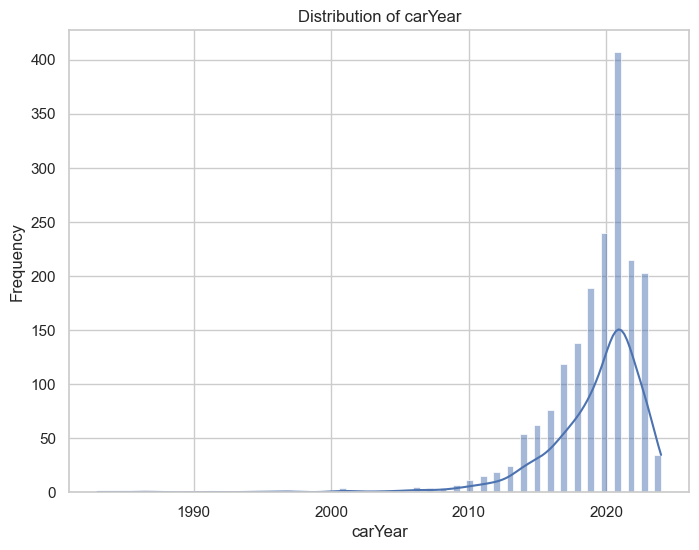

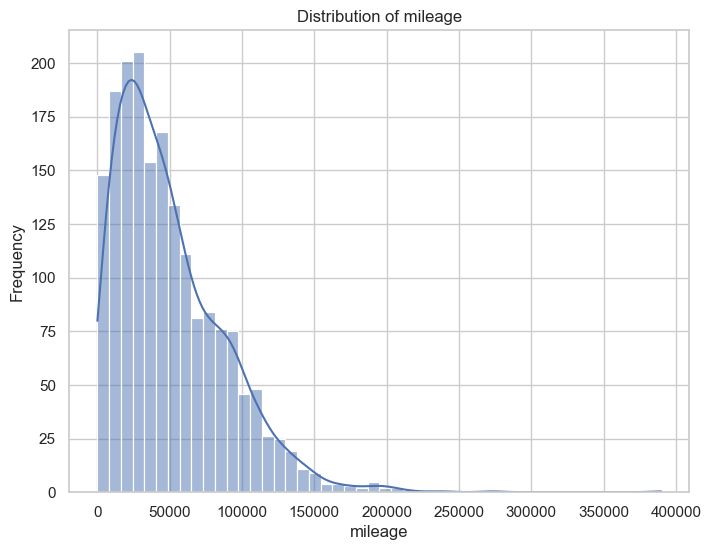

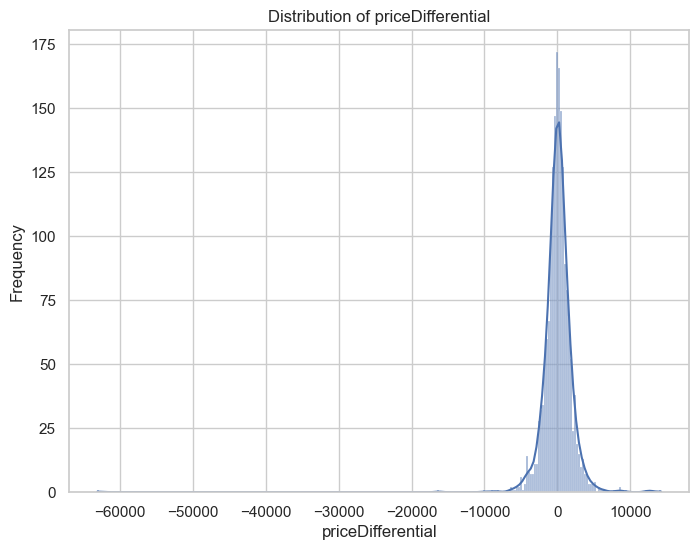

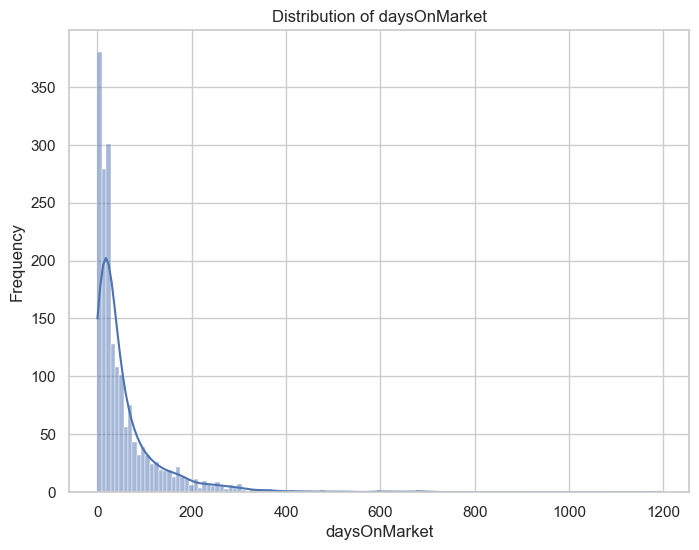

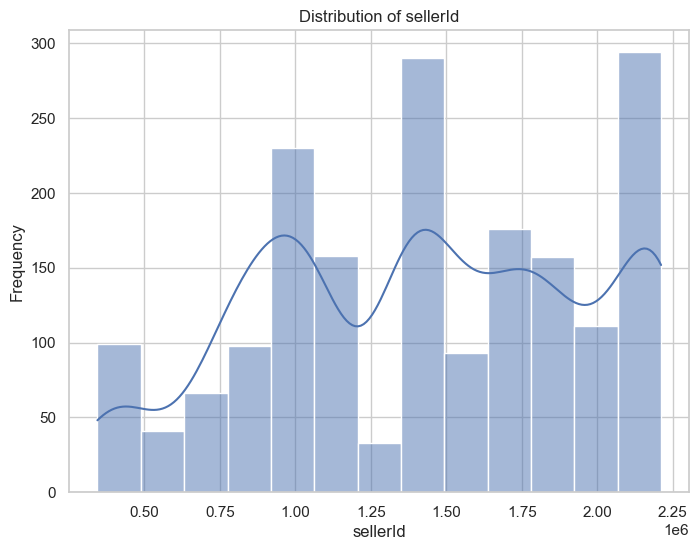

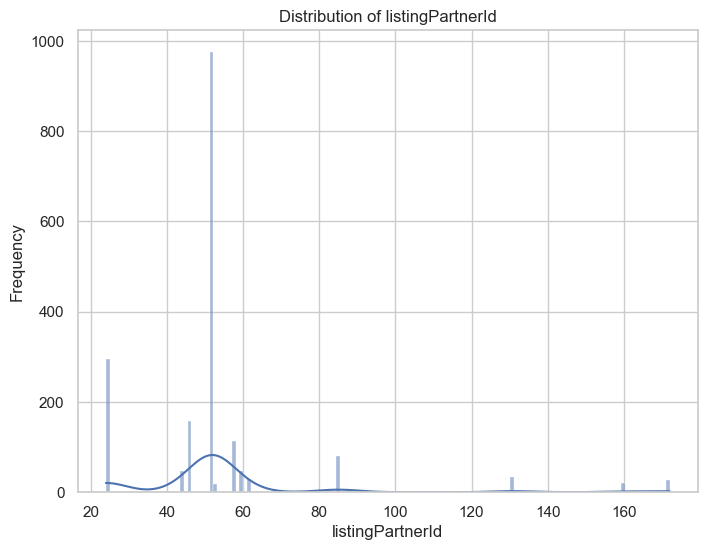

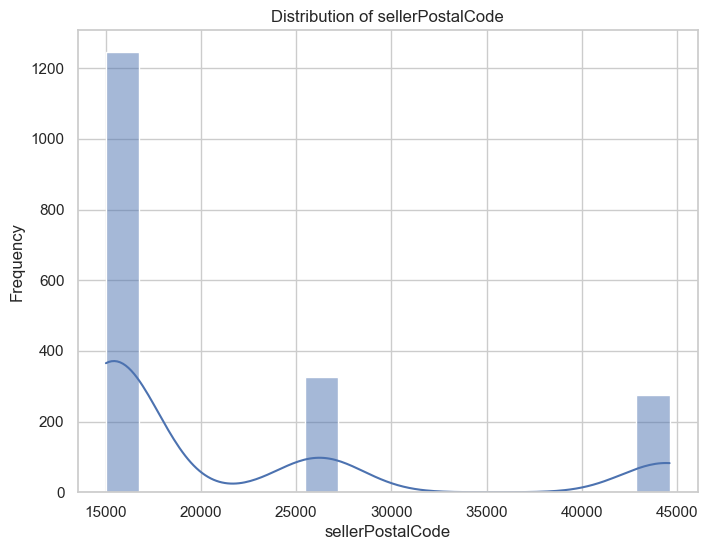

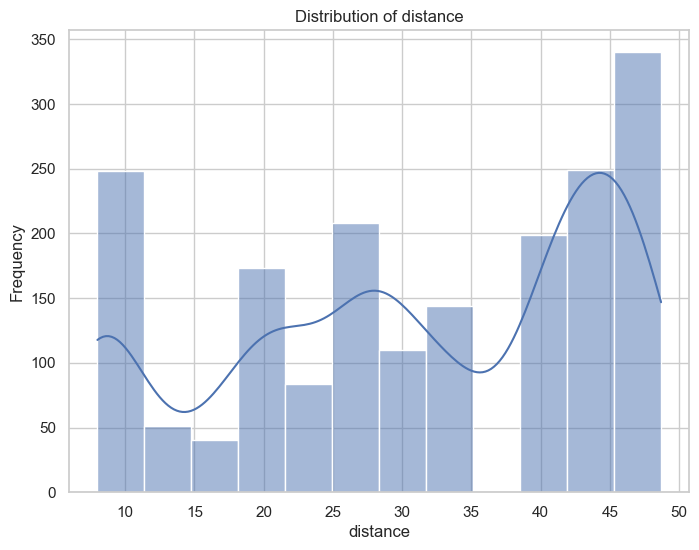

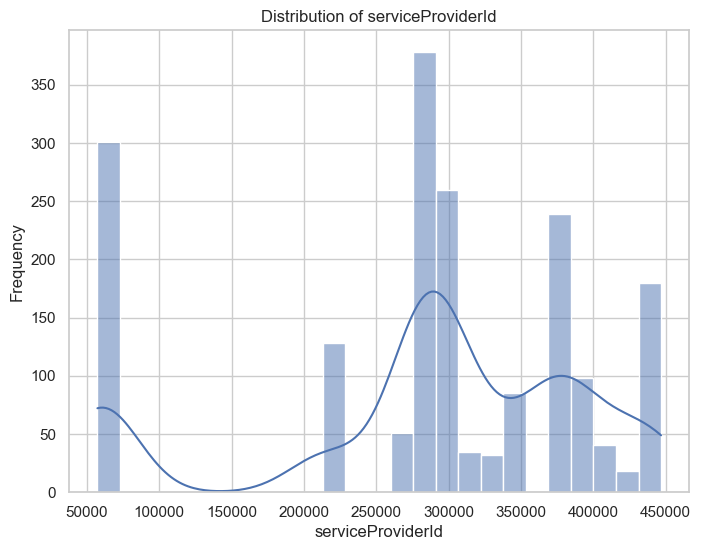

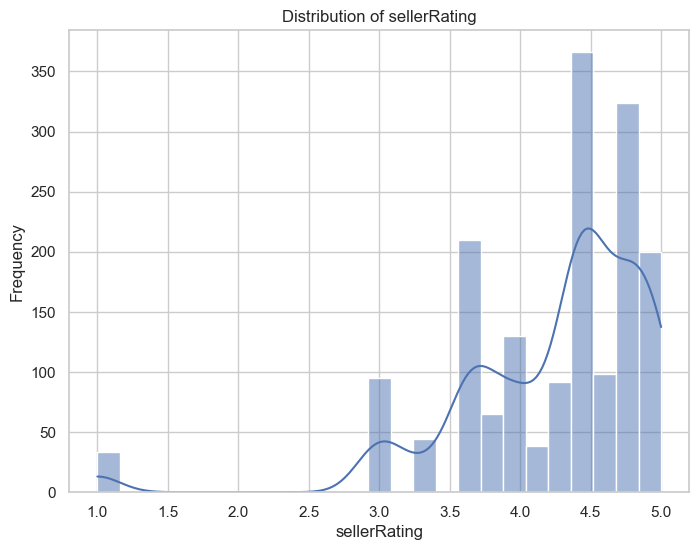

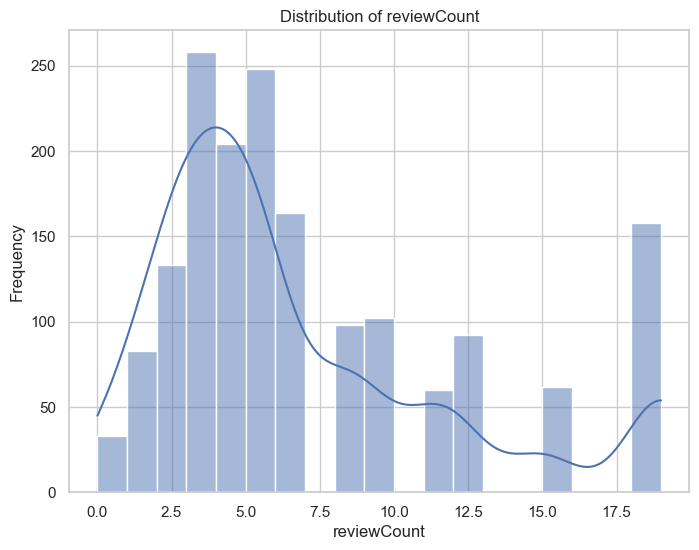

In [14]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot histograms for numerical features
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()




## Top Categories in Categorical Features

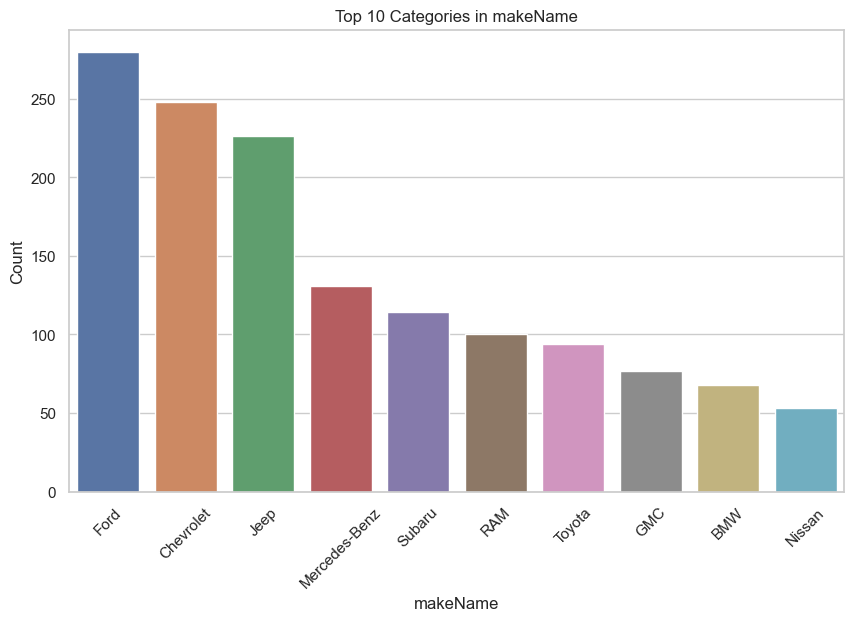

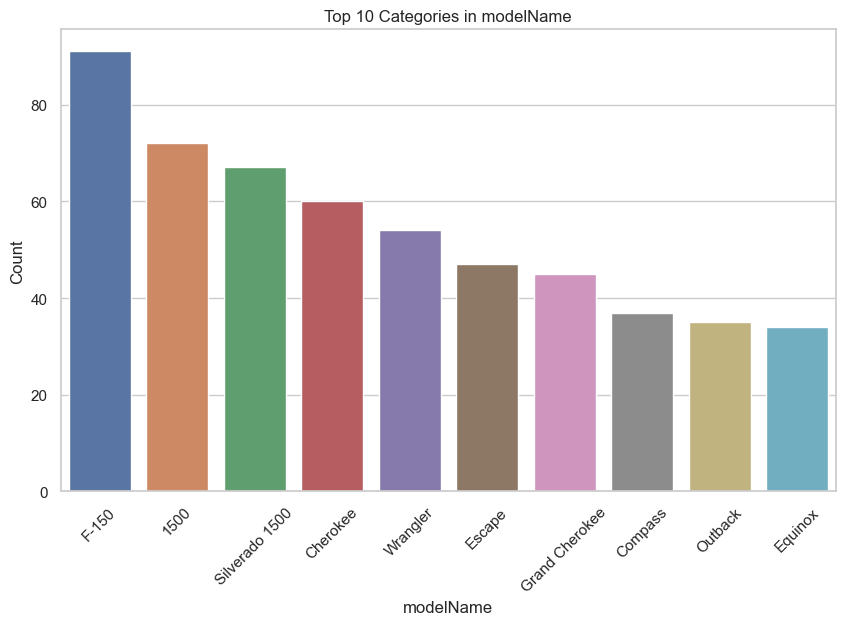

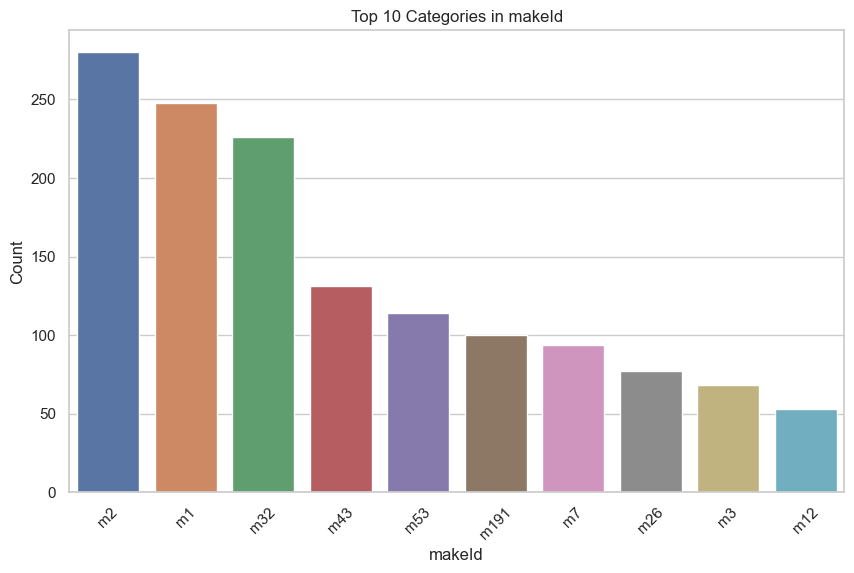

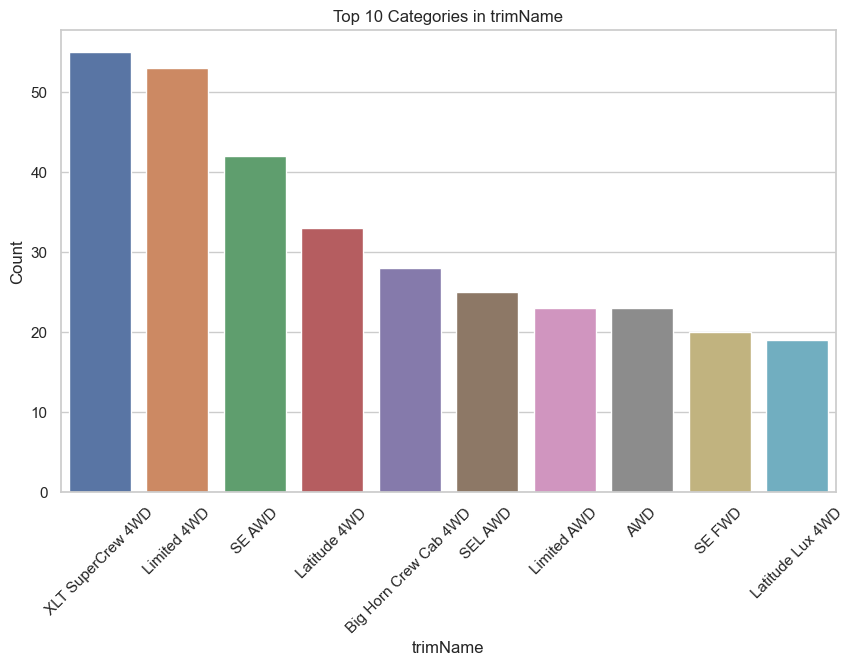

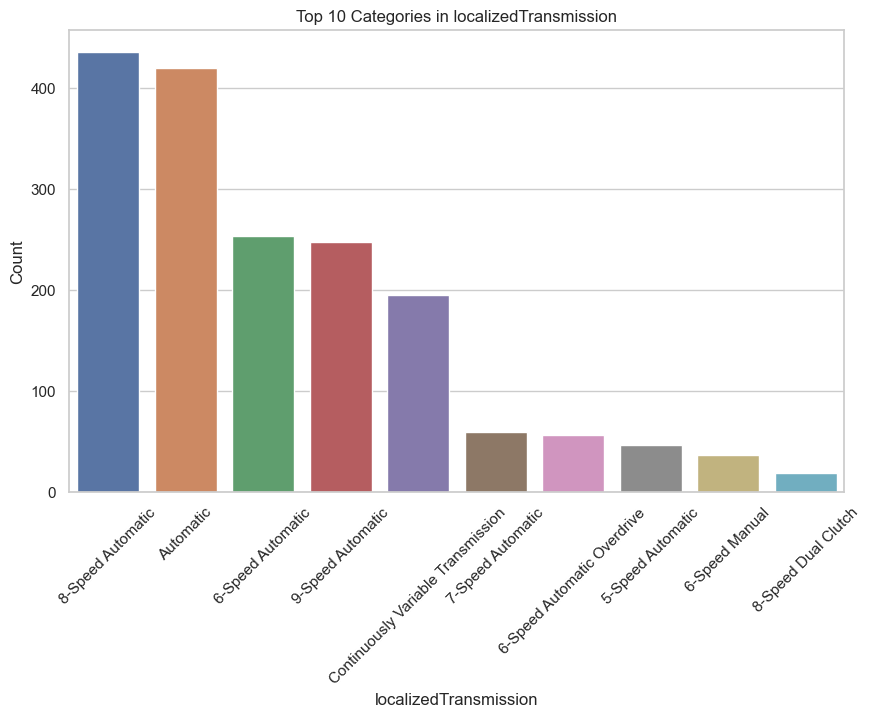

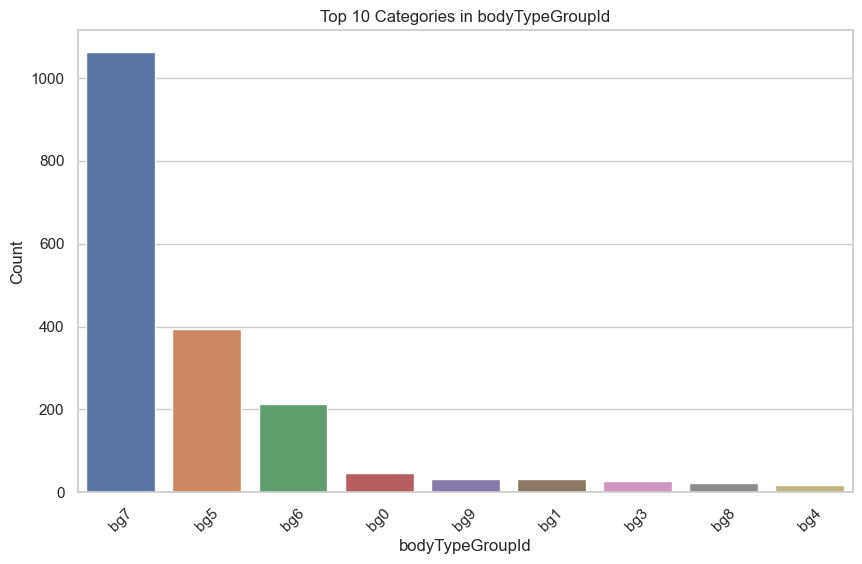

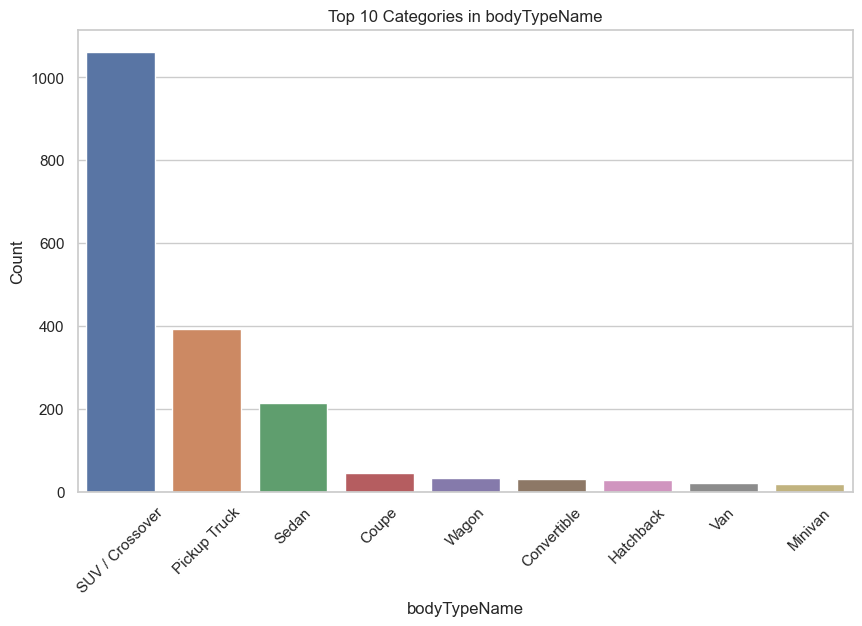

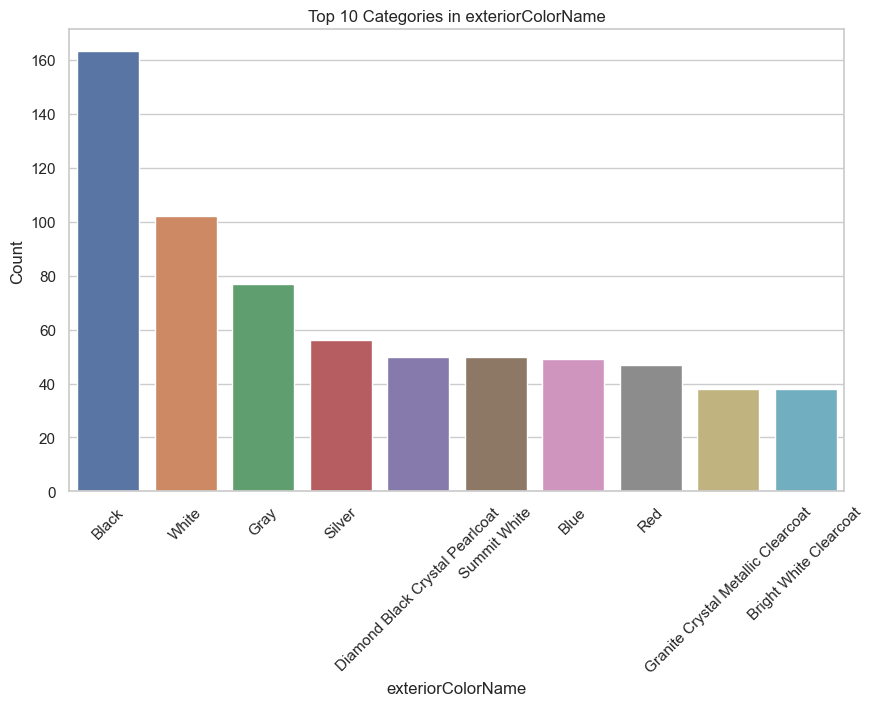

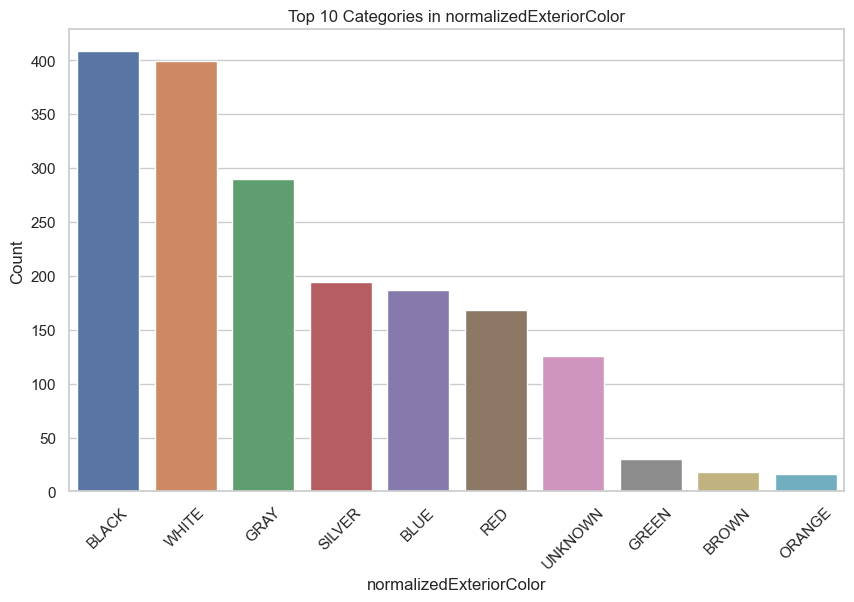

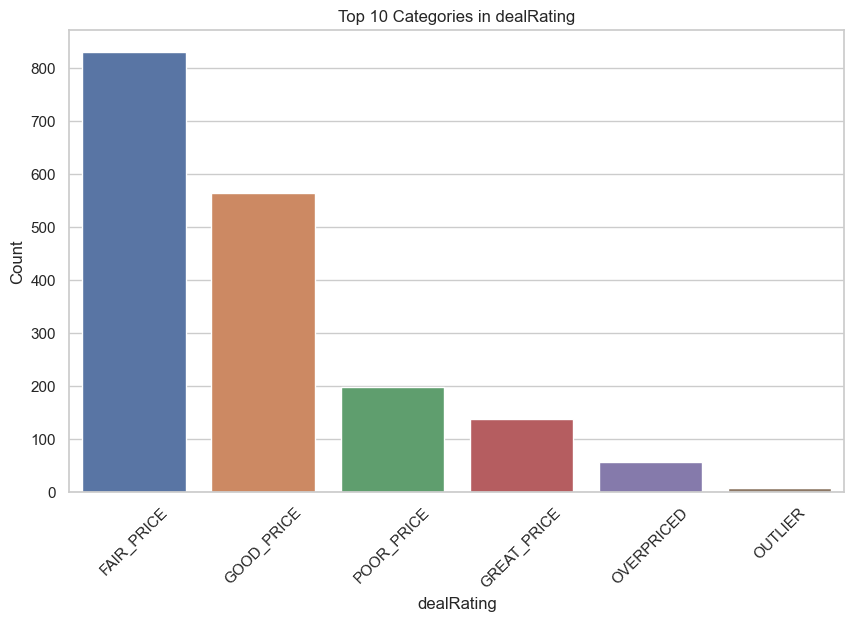

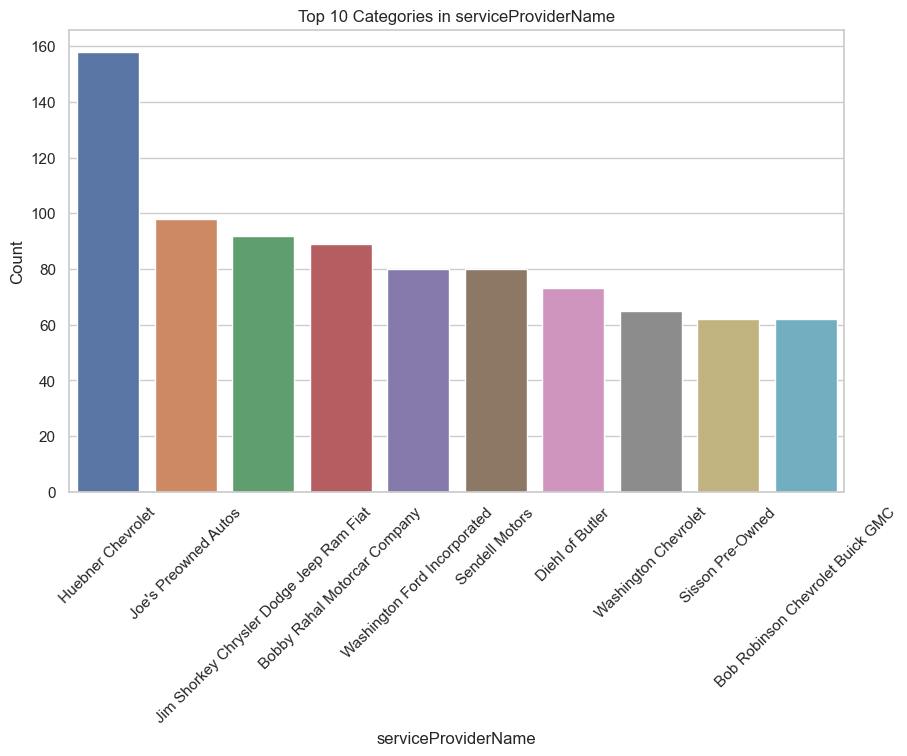

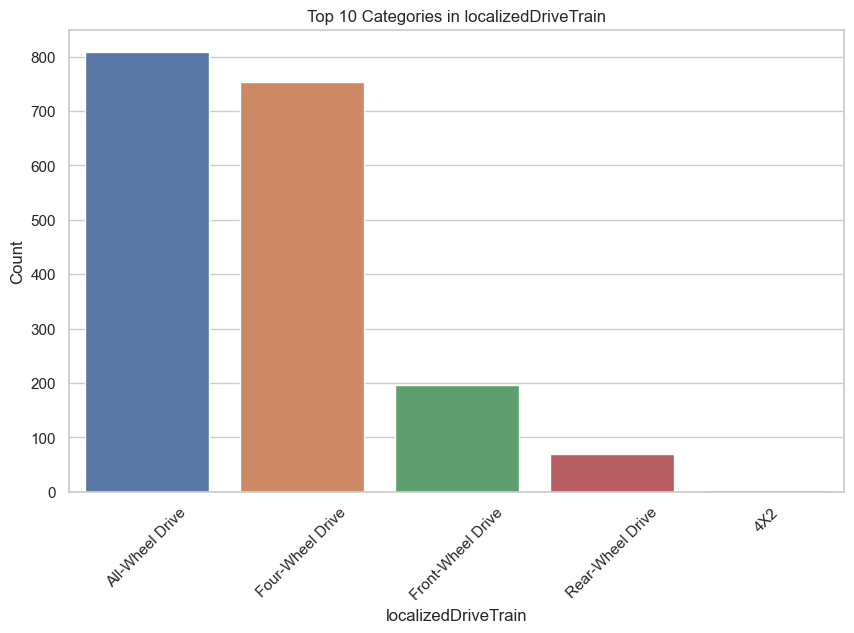

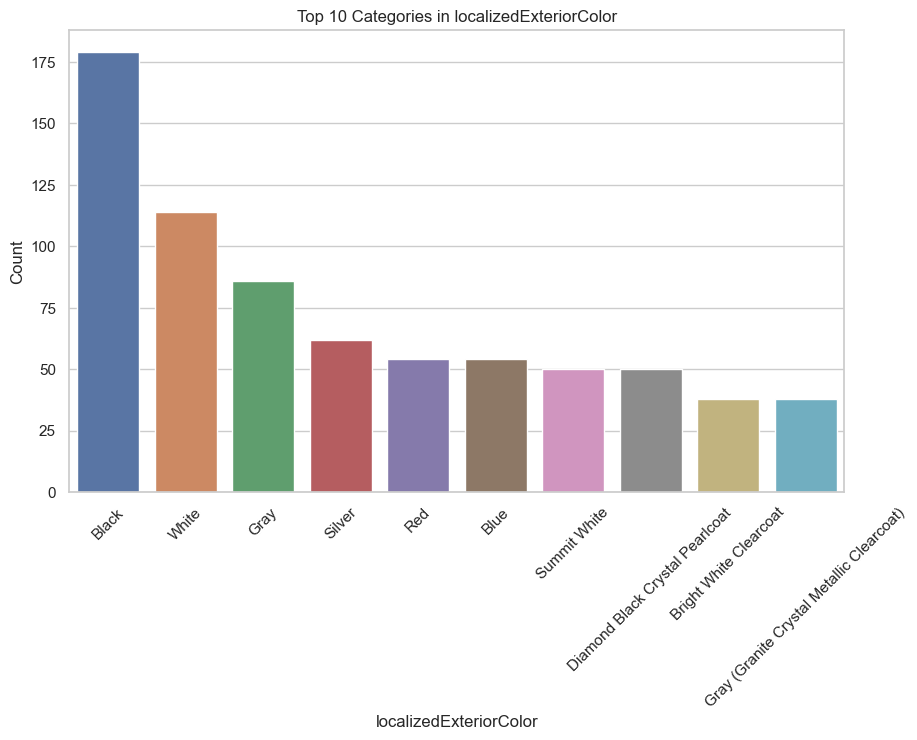

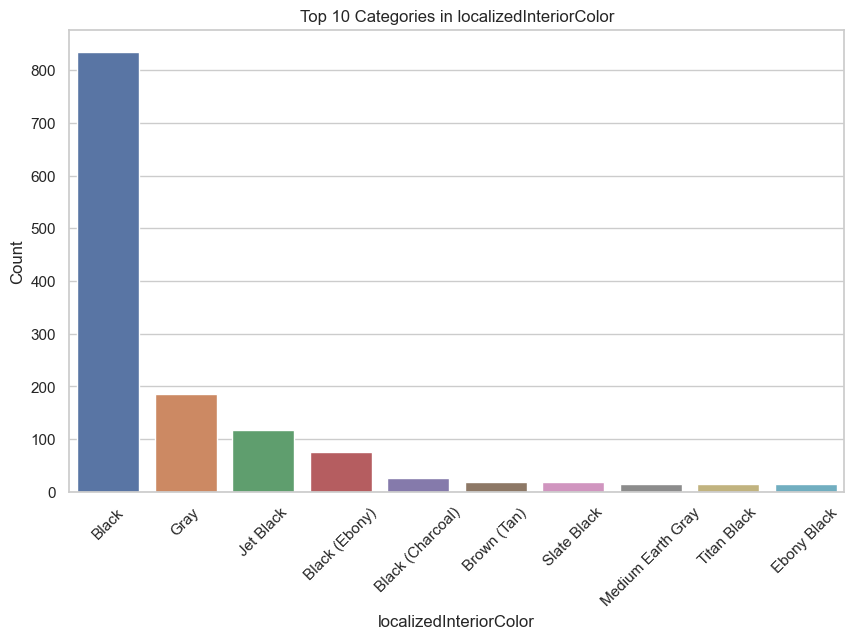

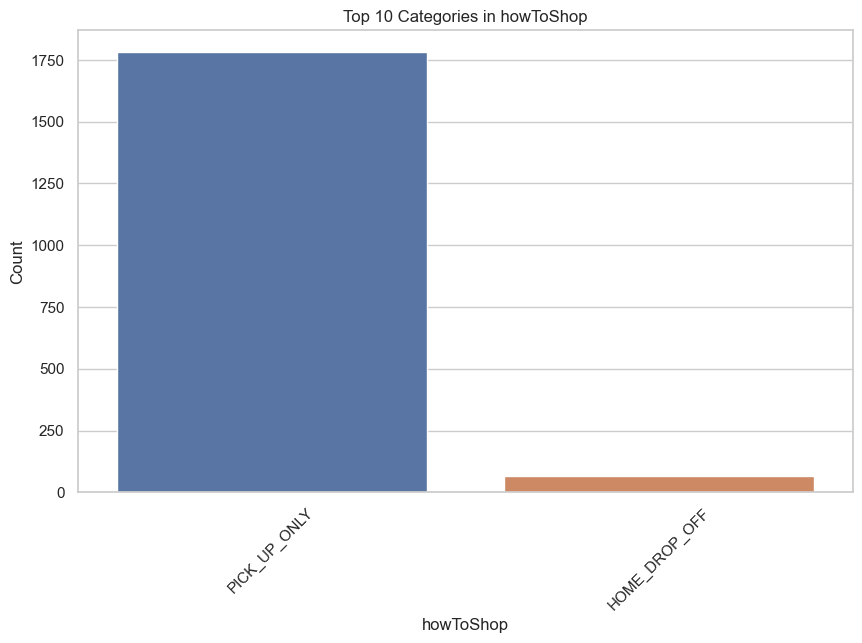

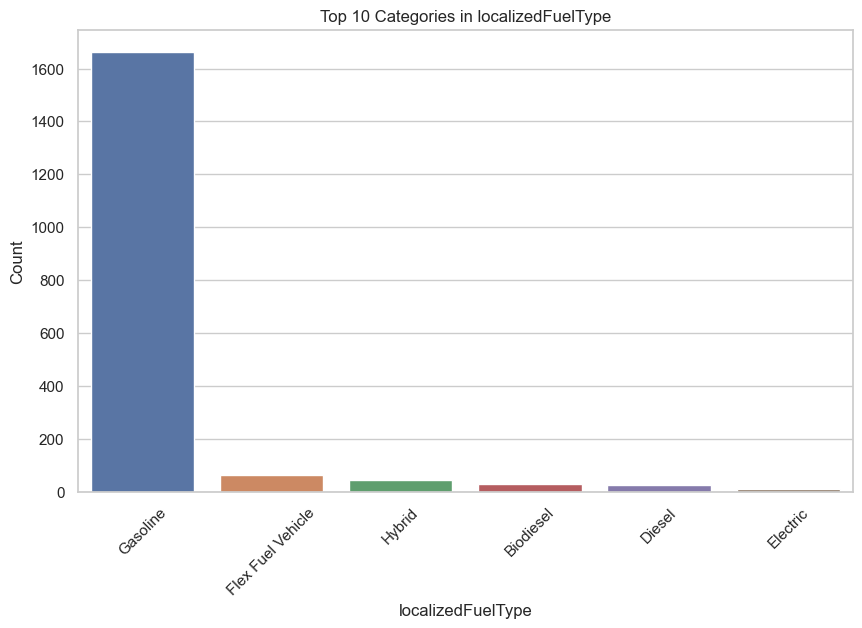

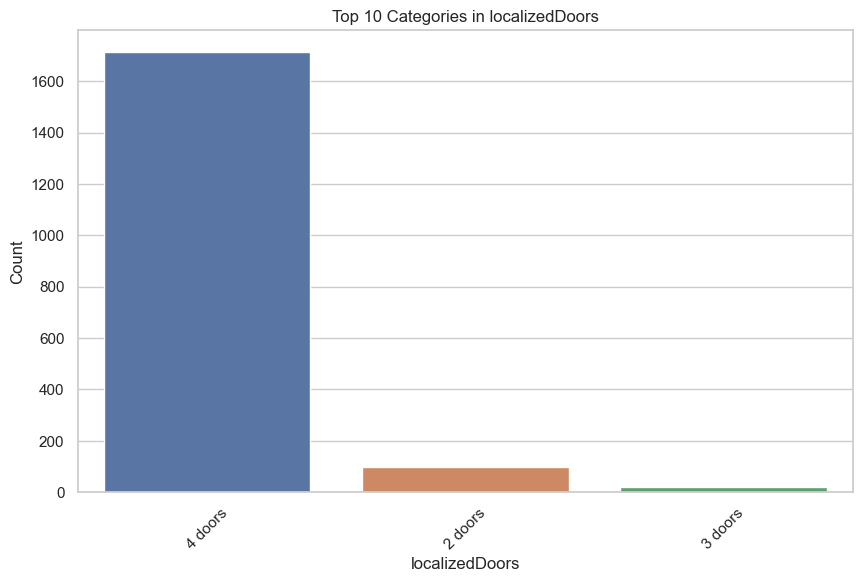

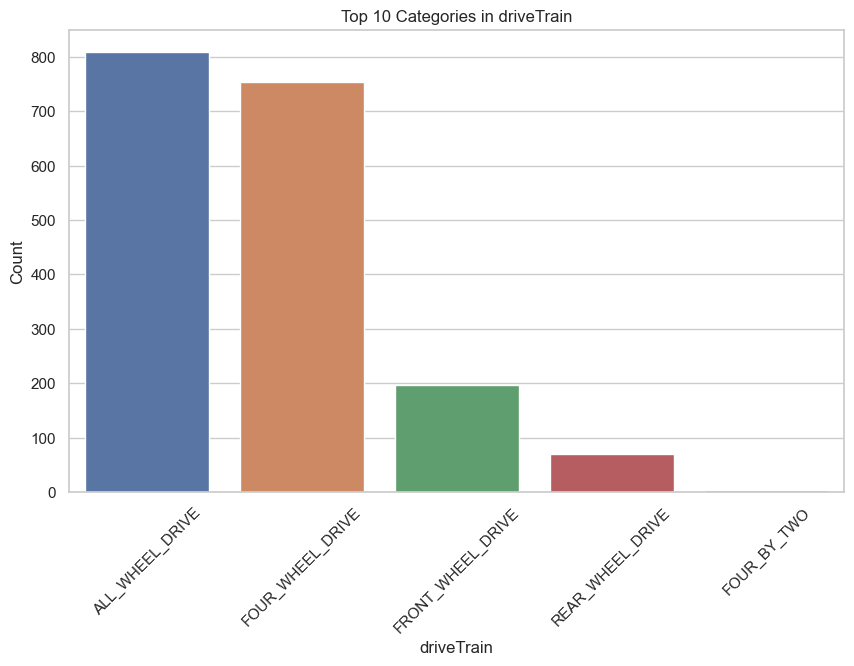

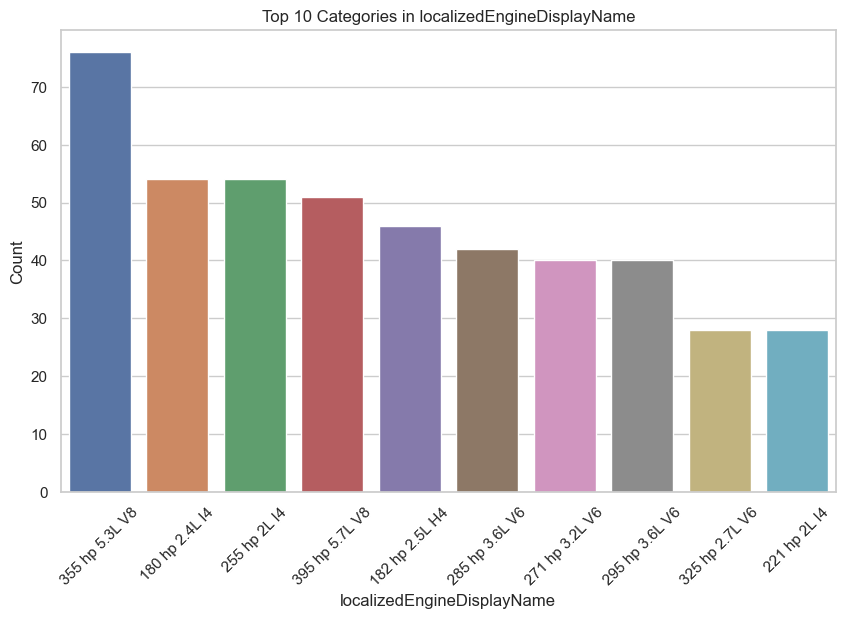

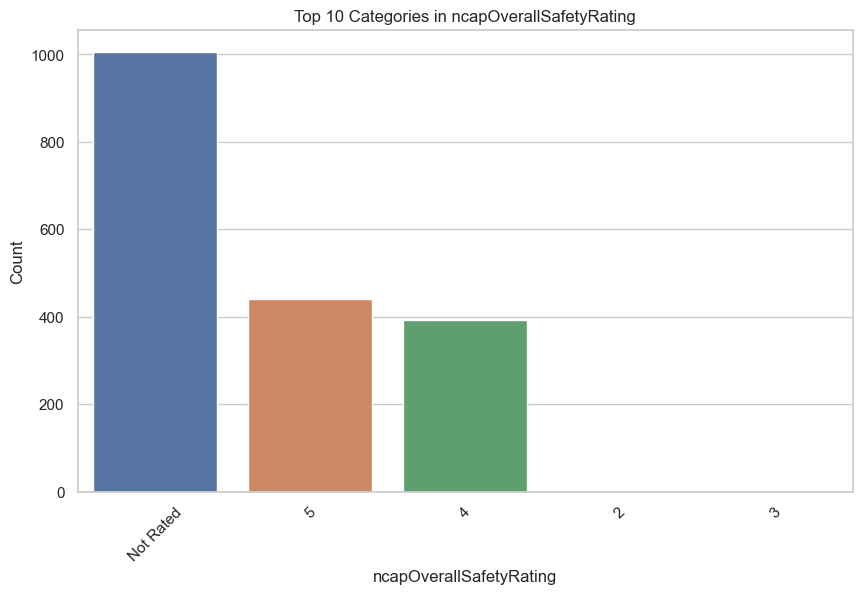

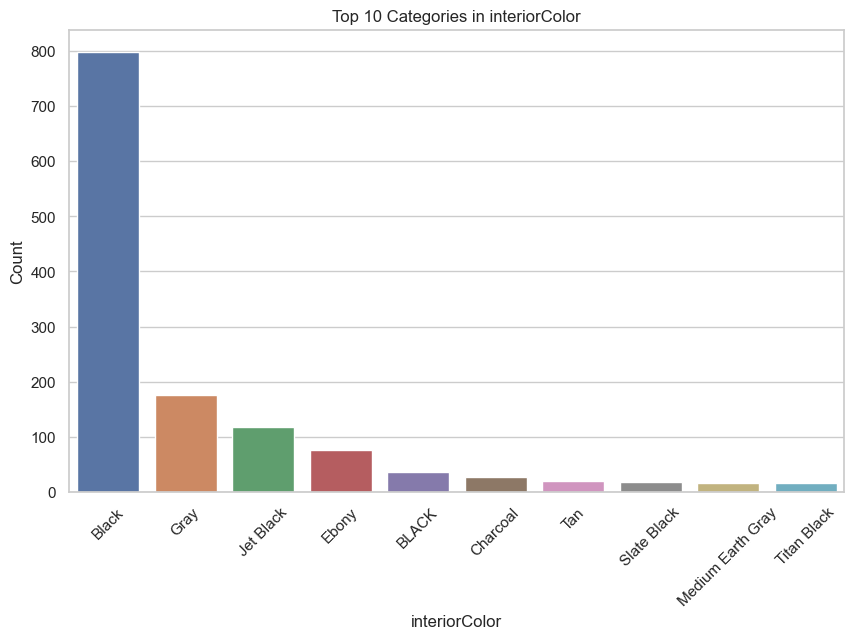

In [18]:
# Set the number of top categories to display
top_categories = 10  # Adjust as needed

# Plot count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    
    # Select the top N most frequent categories
    top_categories_count = df[feature].value_counts().head(top_categories)
    
    # Plot the count plot
    sns.countplot(data=df[df[feature].isin(top_categories_count.index)], x=feature, order=top_categories_count.index)
    
    plt.title(f'Top {top_categories} Categories in {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


## Distribution of Mileage for Different Deal Ratings

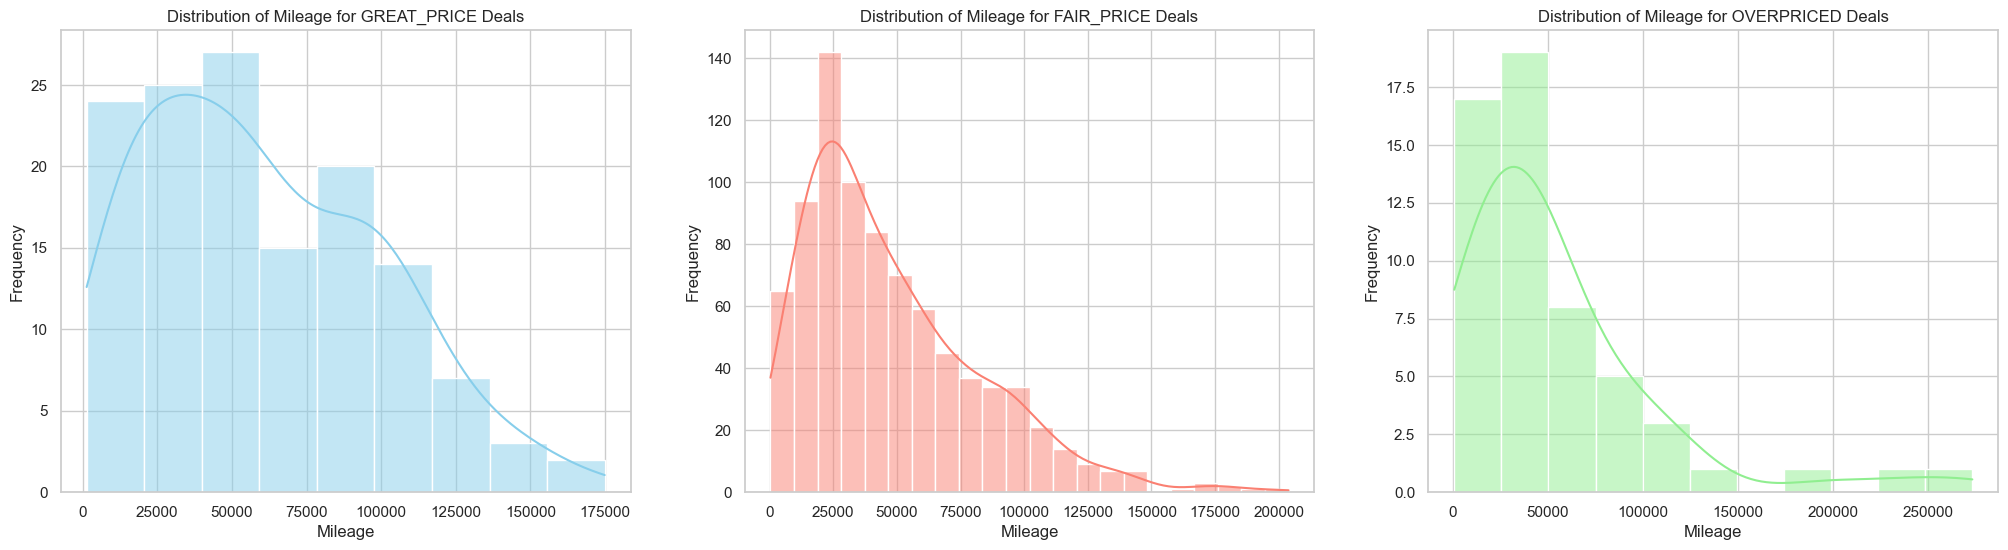

In [17]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df[df.dealRating=='GREAT_PRICE'], x='mileage', kde=True, color='skyblue')
plt.title('Distribution of Mileage for GREAT_PRICE Deals')
plt.xlabel('Mileage')
plt.ylabel('Frequency')

plt.subplot(132)
sns.histplot(data=df[df.dealRating=='FAIR_PRICE'], x='mileage', kde=True, color='salmon')
plt.title('Distribution of Mileage for FAIR_PRICE Deals')
plt.xlabel('Mileage')
plt.ylabel('Frequency')

plt.subplot(133)
sns.histplot(data=df[df.dealRating=='OVERPRICED'], x='mileage', kde=True, color='lightgreen')
plt.title('Distribution of Mileage for OVERPRICED Deals')
plt.xlabel('Mileage')
plt.ylabel('Frequency')

plt.show()


## Distribution of Mileage, Price Differential, and Days on Market

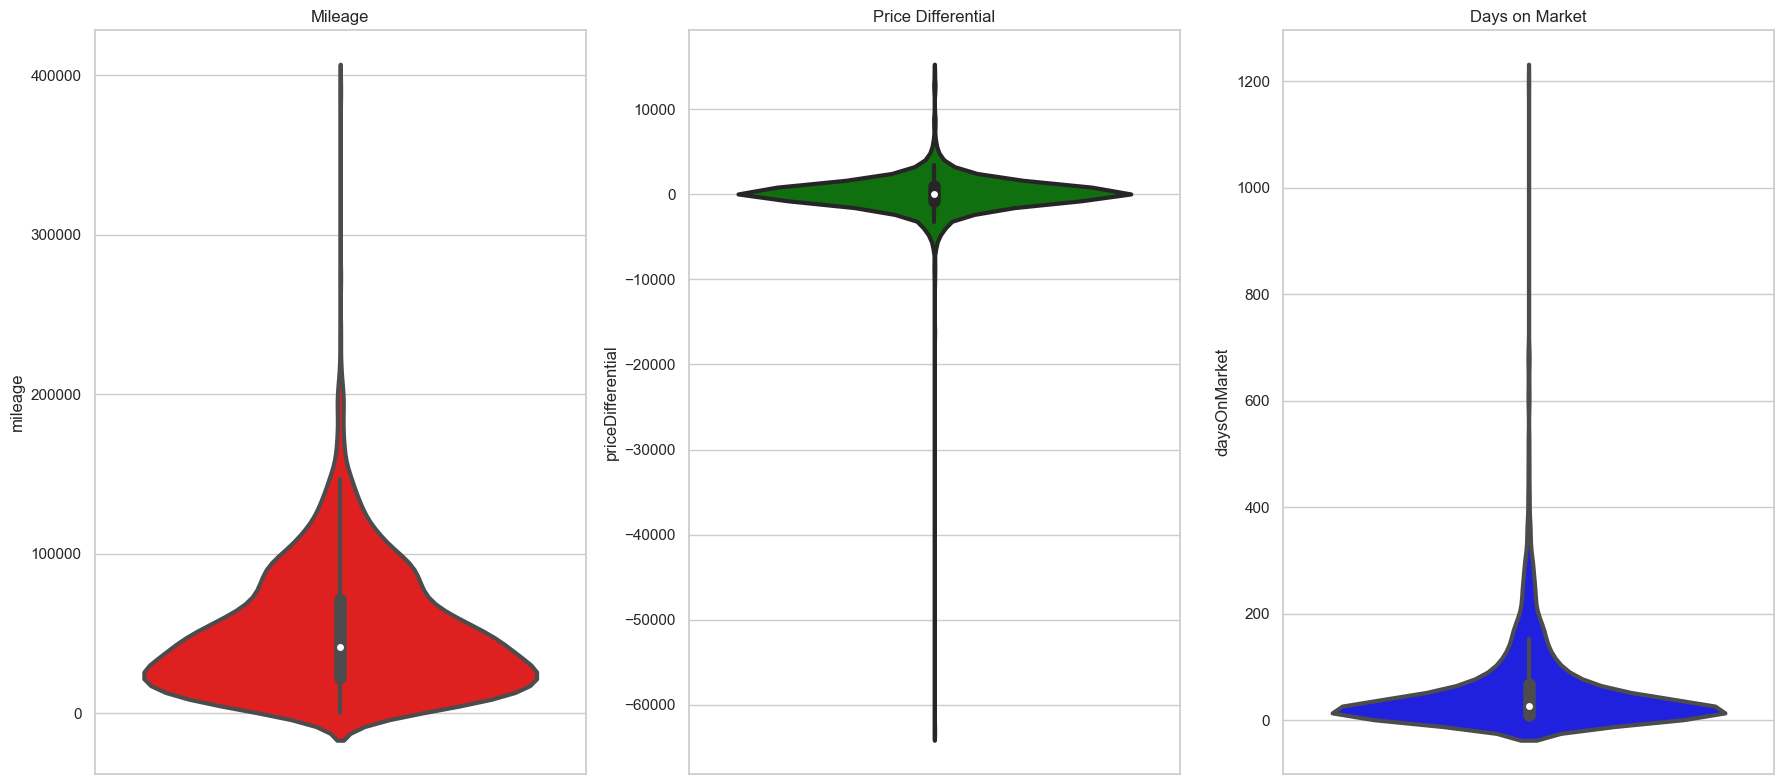

In [19]:
plt.figure(figsize=(18, 8))

# Plot violin plots for mileage, priceDifferential, and daysOnMarket
plt.subplot(1, 3, 1)
plt.title('Mileage')
sns.violinplot(y='mileage', data=df, color='red', linewidth=3)

plt.subplot(1, 3, 2)
plt.title('Price Differential')
sns.violinplot(y='priceDifferential', data=df, color='green', linewidth=3)

plt.subplot(1, 3, 3)
plt.title('Days on Market')
sns.violinplot(y='daysOnMarket', data=df, color='blue', linewidth=3)

plt.tight_layout()
plt.show()



## Top 5 Categorical Features Visualization

In [31]:


# Set the size of the figure
plt.figure(figsize=(200, 56))

# Plot for the 'makeName' column
plt.subplot(1, 5, 1)
size = df['makeName'].value_counts().head(5)
labels = size.index.tolist()
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', textprops={'fontsize': 80})
plt.title('Top 5 Car Makes', fontsize=100)
plt.axis('equal')

# Plot for the 'bodyTypeName' column
plt.subplot(1, 5, 2)
size = df['bodyTypeName'].value_counts().head(5)
labels = size.index.tolist()
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', textprops={'fontsize': 80})
plt.title('Top 5 Body Types', fontsize=100)
plt.axis('equal')

# Plot for the 'localizedTransmission' column
plt.subplot(1, 5, 3)
size = df['localizedTransmission'].value_counts().head(5)
labels = size.index.tolist()
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', textprops={'fontsize': 80})
plt.title('Top 5 Transmissions', fontsize=100)
plt.axis('equal')

# Plot for the 'dealRating' column
plt.subplot(1, 5, 4)
size = df['dealRating'].value_counts()
labels = size.index.tolist()
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', textprops={'fontsize': 80})
plt.title('Deal Ratings', fontsize=100)
plt.axis('equal')

# Plot for the 'howToShop' column
plt.subplot(1, 5, 5)
size = df['howToShop'].value_counts()
labels = size.index.tolist()
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%', textprops={'fontsize': 80})
plt.title('Shopping Methods', fontsize=100)
plt.axis('equal')

# Adjust layout and display the plot
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()


## Top 6 Deal Ratings Visualization

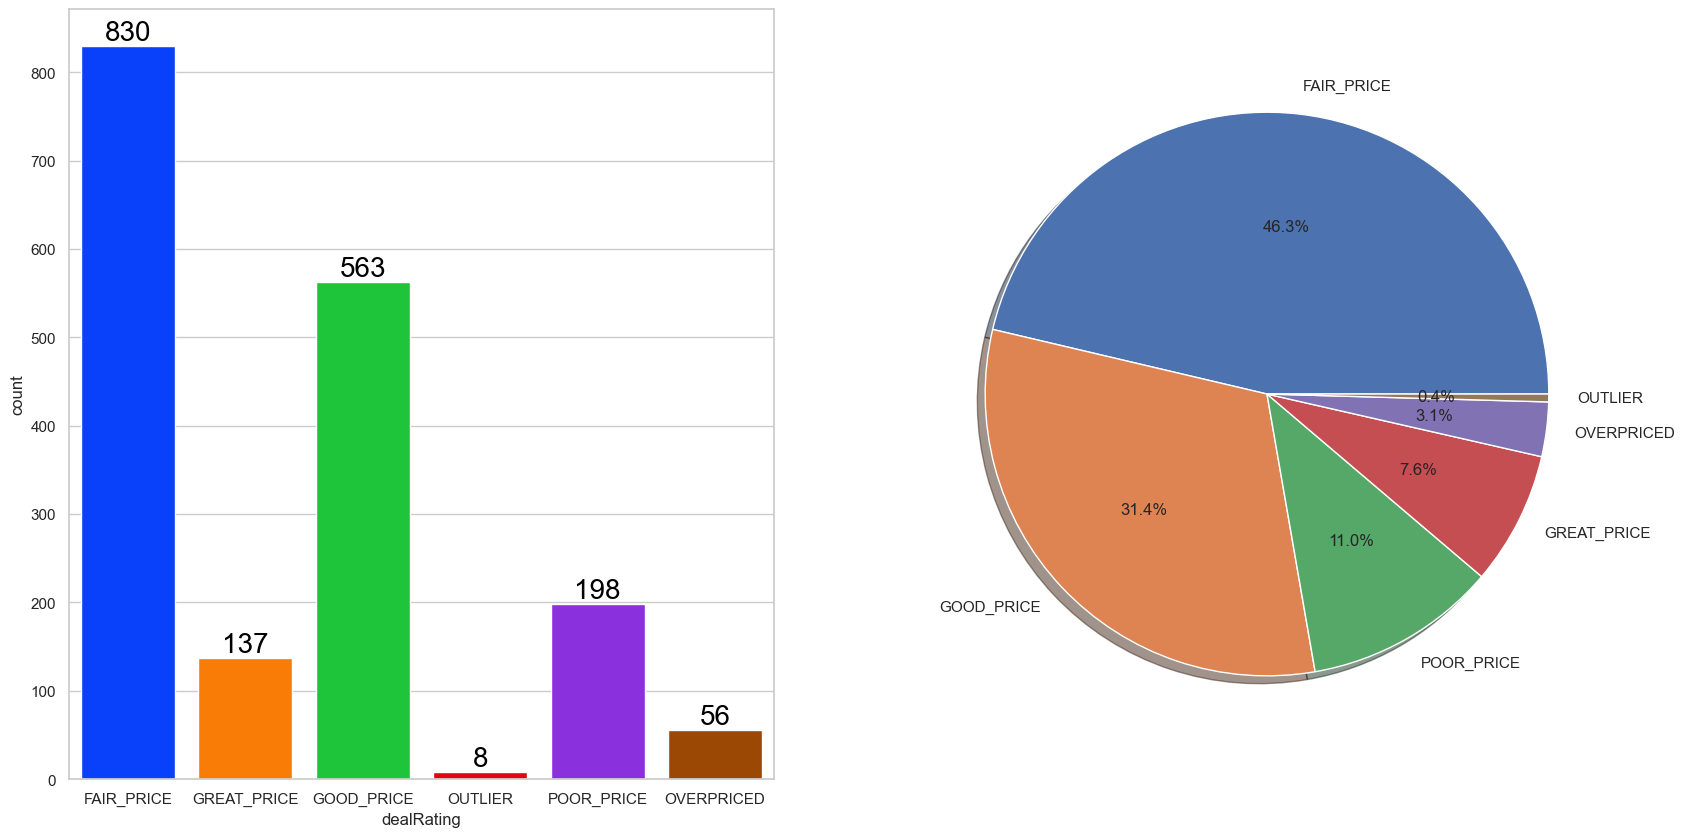

In [41]:
# Get the top 6 values of 'dealRating'
top_deal_ratings = df['dealRating'].value_counts().head(6)

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot for top 5 dealRating
sns.countplot(x=df[df['dealRating'].isin(top_deal_ratings.index)]['dealRating'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart for top 5 dealRating
ax[1].pie(x=top_deal_ratings, labels=top_deal_ratings.index, autopct='%1.1f%%', shadow=True)

# Show the plots
plt.show()


## Top 5 Car Makes Visualization

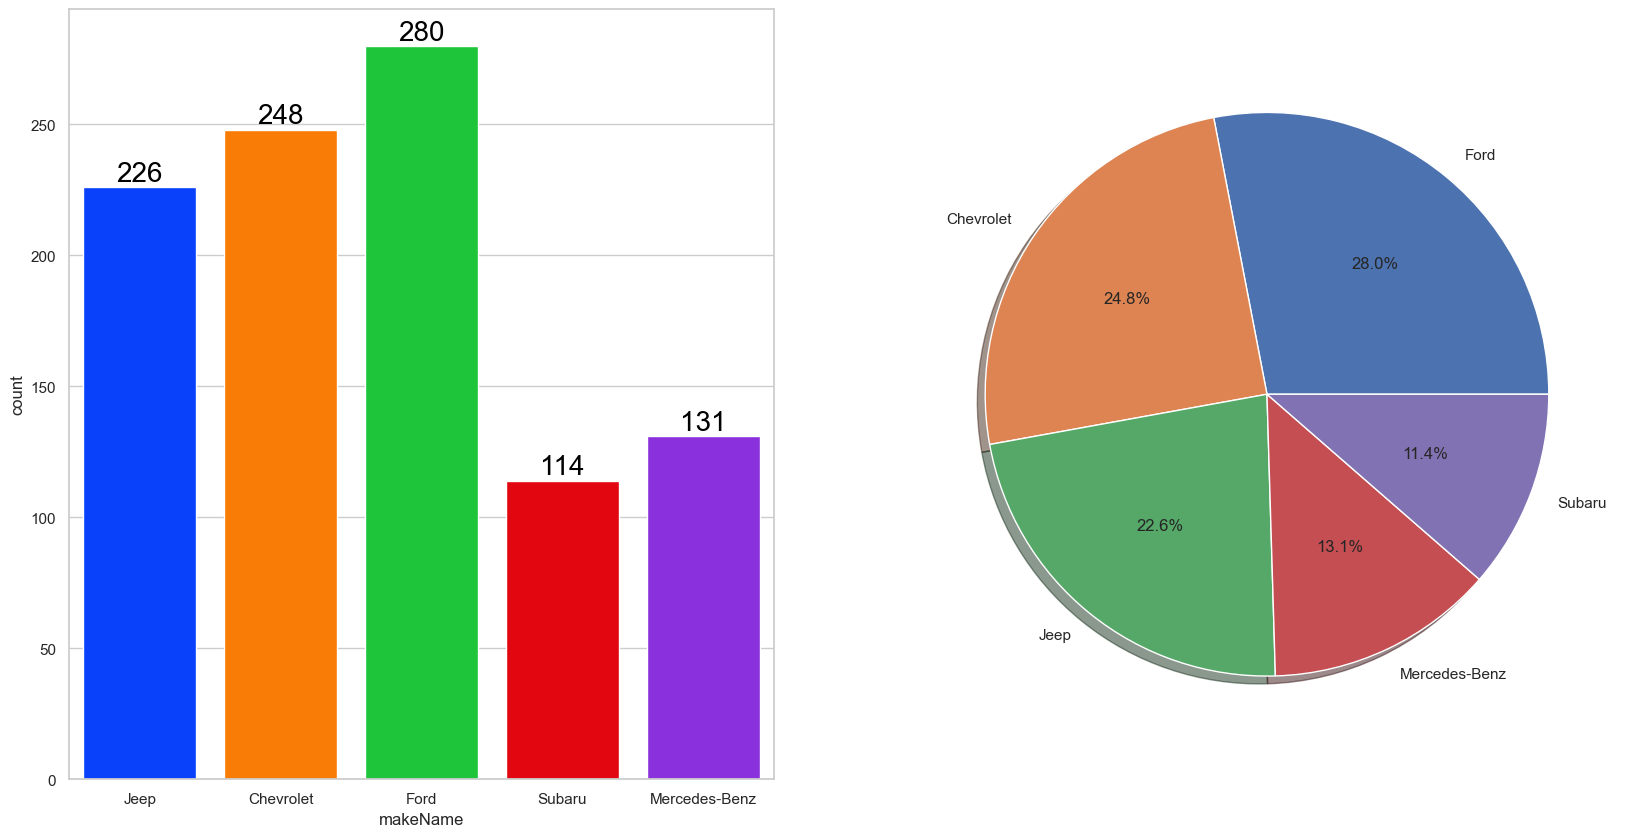

In [39]:
 top_make_name = df['makeName'].value_counts().head(5)
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot for makeName
sns.countplot(x=df[df['makeName'].isin(top_make_name.index)]['makeName'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart for makeName
ax[1].pie(x=df[df['makeName'].isin(top_make_name.index)]['makeName'].value_counts(), labels=top_make_name.index, autopct='%1.1f%%', shadow=True)

# Show the plots
plt.show()
